# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

In [2]:
# Ahora puedes importar los módulos de la carpeta 'utils'
import sys
sys.path.insert(0,'../utils')

import constants as cons  # Reemplaza 'modulo1' con el nombre del archivo que deseas importar
import bootcampviztools as viztools
import funciones as funtils # Reemplaza 'modulo2' con el nombre del archivo que deseas importar

# Carga de datos y visualización de información

In [3]:
df_gamepass = pd.read_csv(cons.DF_GAMEPASS_SRC)
df_gamepass.head()

,GAME,RATIO,GAMERS,COMP %,TIME,RATING,ADDED,True_Achievement,Game_Score
0,Mass Effect Legendary Edition,1.87,"84,143",4.1,100-120 hours,4.8,06 Jan 22,5442,2915
1,The Elder Scrolls V: Skyrim Special Edition,1.97,"213,257",8.0,80-100 hours,4.7,15 Dec 20,3055,1550
2,Mass Effect 2,1.34,"221,178",9.6,50-60 hours,4.7,09 Nov 20,1819,1355
3,Stardew Valley,3.04,"51,530",1.0,150-200 hours,4.7,02 Dec 21,3036,1000
4,It Takes Two,1.68,"71,981",15.6,12-15 hours,4.7,03 Nov 21,1678,1000


In [4]:
#Se eliminan las columnas que no se van a utilizar
df_gamepass = df_gamepass.drop(columns=[cons.RATIO, cons.TRUE_ACHIVEMENTS, cons.GAME_SCORE])
df_gamepass.head()

,GAME,GAMERS,COMP %,TIME,RATING,ADDED
0,Mass Effect Legendary Edition,"84,143",4.1,100-120 hours,4.8,06 Jan 22
1,The Elder Scrolls V: Skyrim Special Edition,"213,257",8.0,80-100 hours,4.7,15 Dec 20
2,Mass Effect 2,"221,178",9.6,50-60 hours,4.7,09 Nov 20
3,Stardew Valley,"51,530",1.0,150-200 hours,4.7,02 Dec 21
4,It Takes Two,"71,981",15.6,12-15 hours,4.7,03 Nov 21


In [5]:
df_gamepass.info()
# Existen nulos y la columna GAMERS no es numerica. Además, sería conveniente modificar la columna TIIME de tal forma que sea  el tiempo medio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GAME    455 non-null    object 
 1   GAMERS  455 non-null    object 
 2   COMP %  455 non-null    float64
 3   TIME    421 non-null    object 
 4   RATING  452 non-null    float64
 5   ADDED   454 non-null    object 
dtypes: float64(2), object(4)
memory usage: 21.5+ KB


In [6]:
df_gamepass[cons.GAMERS] = pd.to_numeric(df_gamepass[cons.GAMERS].str.replace(',', ''), errors='coerce')
df_gamepass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GAME    455 non-null    object 
 1   GAMERS  455 non-null    int64  
 2   COMP %  455 non-null    float64
 3   TIME    421 non-null    object 
 4   RATING  452 non-null    float64
 5   ADDED   454 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 21.5+ KB


In [7]:
df_gamepass[df_gamepass[cons.TIME].isnull()].sort_values(by= cons.GAMERS, ascending=False)


,GAME,GAMERS,COMP %,TIME,RATING,ADDED
242,Fight Night Champion,84000,0.0,NaN,3.6,09 Nov 20
91,Elite: Dangerous,66416,0.0,NaN,4.1,24 Feb 21
336,NBA LIVE 19,29473,0.1,NaN,3.3,09 Nov 20
294,NBA 2K22,18528,0.0,NaN,3.5,28 Apr 22
204,Train Sim World 2,17494,0.0,NaN,3.8,19 Aug 21
414,Library Of Ruina,14668,0.0,NaN,2.2,NaN
365,Edge of Eternity,14114,0.0,NaN,3.2,31 Jan 22
393,Power Rangers: Battle for the Grid,13851,0.4,NaN,2.9,26 Mar 20
384,Nuclear Throne,12261,0.0,NaN,3.0,09 Sep 21
368,Crown Trick,12253,0.0,NaN,3.2,03 Sep 21


Al parecer algunos son juegos que en su momento fueron recien agregados, por lo que no  hay suficientes datos y la mayoría no han sido commpletados o siquiera jugados. De momento, se elimnan los que fueron recien agregados y se buscará si los otros juegos son de algun tipo en particular.

In [8]:
df_gamepass = df_gamepass[df_gamepass[cons.GAMERS] != 0]
df_gamepass.info()


<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 451
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GAME    452 non-null    object 
 1   GAMERS  452 non-null    int64  
 2   COMP %  452 non-null    float64
 3   TIME    421 non-null    object 
 4   RATING  452 non-null    float64
 5   ADDED   451 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.7+ KB


In [9]:
df_gamepass[cons.TIME] = df_gamepass[cons.TIME].apply(funtils.calculate_mean_time)
df_gamepass.head()

,GAME,GAMERS,COMP %,TIME,RATING,ADDED
0,Mass Effect Legendary Edition,84143,4.1,110.0,4.8,06 Jan 22
1,The Elder Scrolls V: Skyrim Special Edition,213257,8.0,90.0,4.7,15 Dec 20
2,Mass Effect 2,221178,9.6,55.0,4.7,09 Nov 20
3,Stardew Valley,51530,1.0,175.0,4.7,02 Dec 21
4,It Takes Two,71981,15.6,13.5,4.7,03 Nov 21


Ahora se carga el otro dataset de Metacritic para hacer el cruce. Posterior a esto, se hará el tyratamiento de nulos

In [10]:
df_metacritic = pd.read_csv(cons.DF_METACRITIC_SRC)
df_metacritic.head()

,id,metascore,platform,release_date,sort_no,summary,title,user_score
0,543718,91,PC,"August 18, 2020",301,"From light planes to wide-body jets, fly highl...",Microsoft Flight Simulator,7.1
1,555108,91,PC,"December 8, 2022",302,"Take up your sword, channel your magic or boar...",Chained Echoes,8.7
2,106820,91,PlayStation 2,"November 7, 2005",303,"Strap on your Guitar Hero SG controller, plug-...",Guitar Hero,8.5
3,110775,91,PC,"November 13, 2008",304,"Players last visited Northrend in ""Warcraft II...",World of Warcraft: Wrath of the Lich King,7.7
4,142864,91,Wii,"October 26, 2010",305,Rock Band returns with the third iteration of ...,Rock Band 3,6.8


In [11]:
#Se eliminan las columnas que no se van a utilizar
df_metacritic = df_metacritic.drop(columns=[cons.ID, cons.PLATFORM, cons.SORT_NO, cons.SUMMARY])
df_metacritic.head()

,metascore,release_date,title,user_score
0,91,"August 18, 2020",Microsoft Flight Simulator,7.1
1,91,"December 8, 2022",Chained Echoes,8.7
2,91,"November 7, 2005",Guitar Hero,8.5
3,91,"November 13, 2008",World of Warcraft: Wrath of the Lich King,7.7
4,91,"October 26, 2010",Rock Band 3,6.8


In [12]:
df_metacritic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20022 entries, 0 to 20021
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   metascore     20022 non-null  int64 
 1   release_date  20022 non-null  object
 2   title         20022 non-null  object
 3   user_score    20022 non-null  object
dtypes: int64(1), object(3)
memory usage: 625.8+ KB


In [13]:
df_metacritic[cons.TITLE] = df_metacritic[cons.TITLE].str.lower()
df_gamepass[cons.GAME] = df_gamepass[cons.GAME].str.lower()
df_merged = pd.merge(df_metacritic, df_gamepass, left_on='title', right_on=cons.GAME, how='inner')
df_merged.head()

,metascore,release_date,title,user_score,GAME,GAMERS,COMP %,TIME,RATING,ADDED
0,91,"August 18, 2020",microsoft flight simulator,7.1,microsoft flight simulator,91677,0.0,NaN,4.4,04 Dec 21
1,91,"September 27, 2019",dragon quest xi s: echoes of an elusive age - ...,8.6,dragon quest xi s: echoes of an elusive age - ...,52220,4.6,110.0,4.5,05 Dec 20
2,91,"November 19, 2009",peggle,7.4,peggle,165096,0.6,45.0,3.8,09 Nov 20
3,91,"November 9, 2021",forza horizon 5,6.7,forza horizon 5,301931,1.6,90.0,4.5,05 Nov 21
4,91,"August 7, 2018",dead cells,8.1,dead cells,86081,0.1,27.5,4.2,16 Dec 19


In [14]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   metascore     912 non-null    int64  
 1   release_date  912 non-null    object 
 2   title         912 non-null    object 
 3   user_score    912 non-null    object 
 4   GAME          912 non-null    object 
 5   GAMERS        912 non-null    int64  
 6   COMP %        912 non-null    float64
 7   TIME          866 non-null    float64
 8   RATING        912 non-null    float64
 9   ADDED         912 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 71.4+ KB


In [15]:
df_merged = df_merged.drop_duplicates()
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 911
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   metascore     908 non-null    int64  
 1   release_date  908 non-null    object 
 2   title         908 non-null    object 
 3   user_score    908 non-null    object 
 4   GAME          908 non-null    object 
 5   GAMERS        908 non-null    int64  
 6   COMP %        908 non-null    float64
 7   TIME          862 non-null    float64
 8   RATING        908 non-null    float64
 9   ADDED         908 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 78.0+ KB


In [16]:
df_merged[df_merged[cons.TIME].isnull()].sort_values(by= cons.GAMERS, ascending=False)

,metascore,release_date,title,user_score,GAME,GAMERS,COMP %,TIME,RATING,ADDED
10,91,"September 20, 2011",gears of war 3,8.1,gears of war 3,388495,0.7,NaN,4.4,16 Dec 19
819,67,"March 20, 2018",sea of thieves,4.8,sea of thieves,344597,0.0,NaN,3.7,18 Dec 19
787,69,"March 20, 2018",sea of thieves,5.3,sea of thieves,344597,0.0,NaN,3.7,18 Dec 19
322,82,"September 10, 2019",gears 5,6.9,gears 5,302711,0.1,NaN,4.1,07 Jan 22
220,84,"September 6, 2019",gears 5,8.2,gears 5,302711,0.1,NaN,4.1,07 Jan 22
740,71,"April 4, 2014",the elder scrolls online,5.7,the elder scrolls online,204295,0.0,NaN,3.9,18 Oct 20
44,90,"July 27, 2021",microsoft flight simulator,7.9,microsoft flight simulator,91677,0.0,NaN,4.4,04 Dec 21
0,91,"August 18, 2020",microsoft flight simulator,7.1,microsoft flight simulator,91677,0.0,NaN,4.4,04 Dec 21
221,84,"March 1, 2011",fight night champion,7.3,fight night champion,84000,0.0,NaN,3.6,09 Nov 20
159,86,"March 1, 2011",fight night champion,7.4,fight night champion,84000,0.0,NaN,3.6,09 Nov 20


Antes de quitar los nulos, se observa que hay titulos repetidos. Por lo tanto, se van a quitar duplicados de tal forma que se conserven titulos con las calificaciones y porcentaje de completado más altos

In [17]:
df_merged = df_merged.sort_values(by=[cons.USER_SCORE, cons.COMP, cons.METASCORE], ascending=False).drop_duplicates(subset=cons.TITLE, keep='first')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 483 to 777
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   metascore     357 non-null    int64  
 1   release_date  357 non-null    object 
 2   title         357 non-null    object 
 3   user_score    357 non-null    object 
 4   GAME          357 non-null    object 
 5   GAMERS        357 non-null    int64  
 6   COMP %        357 non-null    float64
 7   TIME          333 non-null    float64
 8   RATING        357 non-null    float64
 9   ADDED         357 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 30.7+ KB


In [18]:
df_merged[df_merged[cons.TIME].isnull()].sort_values(by= cons.GAMERS, ascending=False)

,metascore,release_date,title,user_score,GAME,GAMERS,COMP %,TIME,RATING,ADDED
10,91,"September 20, 2011",gears of war 3,8.1,gears of war 3,388495,0.7,NaN,4.4,16 Dec 19
787,69,"March 20, 2018",sea of thieves,5.3,sea of thieves,344597,0.0,NaN,3.7,18 Dec 19
220,84,"September 6, 2019",gears 5,8.2,gears 5,302711,0.1,NaN,4.1,07 Jan 22
740,71,"April 4, 2014",the elder scrolls online,5.7,the elder scrolls online,204295,0.0,NaN,3.9,18 Oct 20
44,90,"July 27, 2021",microsoft flight simulator,7.9,microsoft flight simulator,91677,0.0,NaN,4.4,04 Dec 21
159,86,"March 1, 2011",fight night champion,7.4,fight night champion,84000,0.0,NaN,3.6,09 Nov 20
428,80,"October 6, 2015",elite: dangerous,6.9,elite: dangerous,66416,0.0,NaN,4.1,24 Feb 21
253,83,"May 14, 2021",subnautica: below zero,7.8,subnautica: below zero,41620,23.0,NaN,3.6,23 Sep 21
672,73,"September 7, 2018",nba live 19,6.4,nba live 19,29473,0.1,NaN,3.3,09 Nov 20
591,76,"September 10, 2021",nba 2k22,4.1,nba 2k22,18528,0.0,NaN,3.5,28 Apr 22


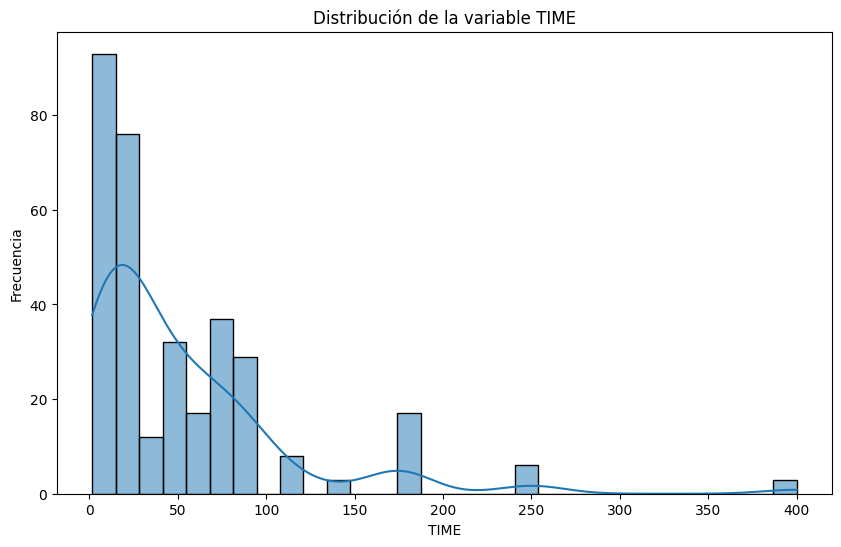

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_merged[cons.TIME].dropna(), bins=30, kde=True)
plt.title('Distribución de la variable TIME')
plt.xlabel('TIME')
plt.ylabel('Frecuencia')
plt.show()

In [20]:
df_merged.describe()

,metascore,GAMERS,COMP %,TIME,RATING
count,357.000000,357.000000,357.000000,333.000000,357.000000
mean,78.364146,92863.577031,5.957143,51.876877,3.786275
std,8.706942,93055.655763,10.100586,60.668476,0.454326
min,43.000000,166.000000,0.000000,1.500000,2.200000
25%,73.000000,23287.000000,0.600000,11.000000,3.500000
50%,79.000000,61345.000000,1.900000,27.500000,3.800000
75%,84.000000,128274.000000,6.100000,70.000000,4.100000
max,96.000000,455839.000000,62.900000,400.000000,4.800000


Revisando los juegos que siguen con valor nulo en tiempo, se puede notar que la mayoría son juegos online, por lo que no tienen un tiempo de juego definido. Sin embargo, aun existen algunos juegos offline que no cuentan con horas de juego. Por  lo tanto, se propone lo siguiente:
* Se tomará un umbral de número de jugadores  para descartar algunos titulos, en este caso se eliminaran los juegos con menos de 1000 jugadores
* Al revisar la distribución de valores de la variable TIME y viendo sus valores estadísticos, se decide que los valores nulos restantes serán reemplazados por la mediana. Esto porque lo usual es que los videojuegos duren alrededor de 30 horas actualmente.

In [21]:
# Eliminar juegos con menos de 1000 jugadores
df_merged = df_merged[df_merged[cons.GAMERS] >= 1000]

# Reemplazar valores nulos en la columna TIME con la mediana
median_time = df_merged[cons.TIME].median()
df_merged[cons.TIME].fillna(median_time, inplace=True)

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 483 to 777
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   metascore     354 non-null    int64  
 1   release_date  354 non-null    object 
 2   title         354 non-null    object 
 3   user_score    354 non-null    object 
 4   GAME          354 non-null    object 
 5   GAMERS        354 non-null    int64  
 6   COMP %        354 non-null    float64
 7   TIME          354 non-null    float64
 8   RATING        354 non-null    float64
 9   ADDED         354 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 30.4+ KB


C:\Users\PC ELITE\AppData\Local\Temp\ipykernel_1668\3069556467.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[cons.TIME].fillna(median_time, inplace=True)


Se elimina la columna added y rrelease_date ya que hasta este punto no nos parecen relevantes


In [22]:
df_merged = df_merged.drop(columns=[cons.ADDED, cons.RELEASE_DATE, cons.GAME])
df_merged.head()

,metascore,title,user_score,GAMERS,COMP %,TIME,RATING
483,78,olija,tbd,4380,14.2,4.5,3.3
802,68,gang beasts,tbd,135527,9.3,1.5,2.9
894,56,recompile,tbd,7808,6.1,7.0,3.2
852,65,moonglow bay,tbd,4060,2.9,45.0,3.5
699,72,lawn mowing simulator,tbd,33974,0.1,70.0,3.3


Finalmente, se tratan los registros en los que 'user_score' tiene un valor tbd.

In [23]:
non_numeric_user_score_count = df_merged[~df_merged[cons.USER_SCORE].apply(lambda x: x.replace('.', '', 1).isdigit())].shape[0]
print(f"Valores no numéricos en 'user_score': {non_numeric_user_score_count}")

Valores no numéricos en 'user_score': 5


Al ser pocos, se pueden reemplazar con 0

In [24]:
df_merged[cons.USER_SCORE] = df_merged[cons.USER_SCORE].apply(lambda x: 0 if not x.replace('.', '', 1).isdigit() else x)

df_merged[cons.USER_SCORE] = pd.to_numeric(df_merged[cons.USER_SCORE])

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 483 to 777
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   metascore   354 non-null    int64  
 1   title       354 non-null    object 
 2   user_score  354 non-null    float64
 3   GAMERS      354 non-null    int64  
 4   COMP %      354 non-null    float64
 5   TIME        354 non-null    float64
 6   RATING      354 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 22.1+ KB


Para nuestro aanalisis, se reemplazan los nombres de las columnas para una mejor comprensión 

In [25]:

df_merged.rename(columns={cons.RATING: cons.XBOX, cons.USER_SCORE: cons.METACRITIC_USER_SCORE}, inplace=True)
df_merged.head()


,metascore,title,metacritic_user_score,GAMERS,COMP %,TIME,xbox_user_score
483,78,olija,0.0,4380,14.2,4.5,3.3
802,68,gang beasts,0.0,135527,9.3,1.5,2.9
894,56,recompile,0.0,7808,6.1,7.0,3.2
852,65,moonglow bay,0.0,4060,2.9,45.0,3.5
699,72,lawn mowing simulator,0.0,33974,0.1,70.0,3.3


Para tener las valoraciones normalizadas, se cambian los campos `xbox_user_score` y `metacritic_user_score` a  una escala de 0 a 100 y `metascore` a tipo de dato float

In [26]:
# Normalizar las valoraciones
df_merged['xbox_user_score'] = df_merged['xbox_user_score'] * 20
df_merged['metacritic_user_score'] = df_merged['metacritic_user_score'] * 10
df_merged['metascore'] = df_merged['metascore'].astype(float)
df_merged.reset_index(drop=True, inplace=True)
df_merged.head()

,metascore,title,metacritic_user_score,GAMERS,COMP %,TIME,xbox_user_score
0,78.0,olija,0.0,4380,14.2,4.5,66.0
1,68.0,gang beasts,0.0,135527,9.3,1.5,58.0
2,56.0,recompile,0.0,7808,6.1,7.0,64.0
3,65.0,moonglow bay,0.0,4060,2.9,45.0,70.0
4,72.0,lawn mowing simulator,0.0,33974,0.1,70.0,66.0


Ya se puede empezar con  el análisis

# Análisis

Para una mejor comprensión de cada variable, la siguiente tabla detalla de que va cada una
| Columna/Variable       | Descripción                                                                                                                                                               | Tipo       | Importancia | Nota                                                                                                                          |
|-------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------|-------------|------------------------------------------------------------------------------------------------------------------------------|
| metascore              | Indica la valoración dada por los críticos avalados por Metacritic de cada título                                                                                        | Numérica   | Alta        | Nos ayuda a saber el veredicto de los "expertos".                                                                            |
| title                  | Nombre de cada videojuego                                                                                                                                                 | Categórica | Media       | Ayuda a identificar el nombre del juego, pero en este análisis damos más peso a sus valoraciones.                           |
| metacritic_user_score  | Valoración por los usuarios/jugadores suscritos en Metacritic, pero que no tienen ese "plus" de ser críticos avalados por la plataforma                                   | Numérica   | Alta        | Aunque hay expertos que dan valoraciones a los videojuegos, la comunidad también tiene voz y peso en sus opiniones.          |
| GAMERS                 | Número de jugadores que han jugado el título                                                                                                                              | Numérica   | Alta        | Con el número de jugadores podemos determinar el impacto que tuvo el título desde que se añadió al catálogo.                 |
| COMP %                 | Porcentaje de jugadores que han completado el título                                                                                                                     | Numérica   | Alta        | Nos ayuda a saber cuántos jugadores han aprovechado el servicio para completar los títulos en el catálogo.                   |
| TIME                   | Tiempo medio para completar el título                                                                                                                                     | Numérica   | Media       | Puede ayudarnos a saber cuánto tiempo tarda un jugador en promedio para completar el título y analizar si es un factor clave. |
| xbox_user_score        | Calificación del título dada por usuarios de Xbox                                                                                                                         | Numérica   | Media       | Aunque es una valoración dada por usuarios de Xbox, no nos da mucha certeza, ya que se restringe a usuarios de esta plataforma y son pocas las calificaciones.      |


## Análisis univariante

Empezamos haciendo un análisis univariante de cada variable numérica (ya que son las que nos interesan en ese estudio)

In [27]:
# Análisis univariante de variables numéricas en df_merged
numeric_columns = df_merged.select_dtypes(include=[np.number]).columns

# Estadísticas descriptivas
df_merged[numeric_columns].describe()


,metascore,metacritic_user_score,GAMERS,COMP %,TIME,xbox_user_score
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,78.437853,70.988701,93647.059322,6.007627,50.430791,75.870056
std,8.693577,16.304291,93057.468284,10.128412,59.118143,8.975576
min,43.000000,0.000000,1065.000000,0.000000,1.500000,44.000000
25%,73.000000,67.000000,23690.250000,0.600000,13.500000,70.000000
50%,79.500000,75.000000,62594.500000,1.900000,27.500000,76.000000
75%,84.750000,81.000000,131071.500000,6.100000,70.000000,82.000000
max,96.000000,96.000000,455839.000000,62.900000,400.000000,96.000000


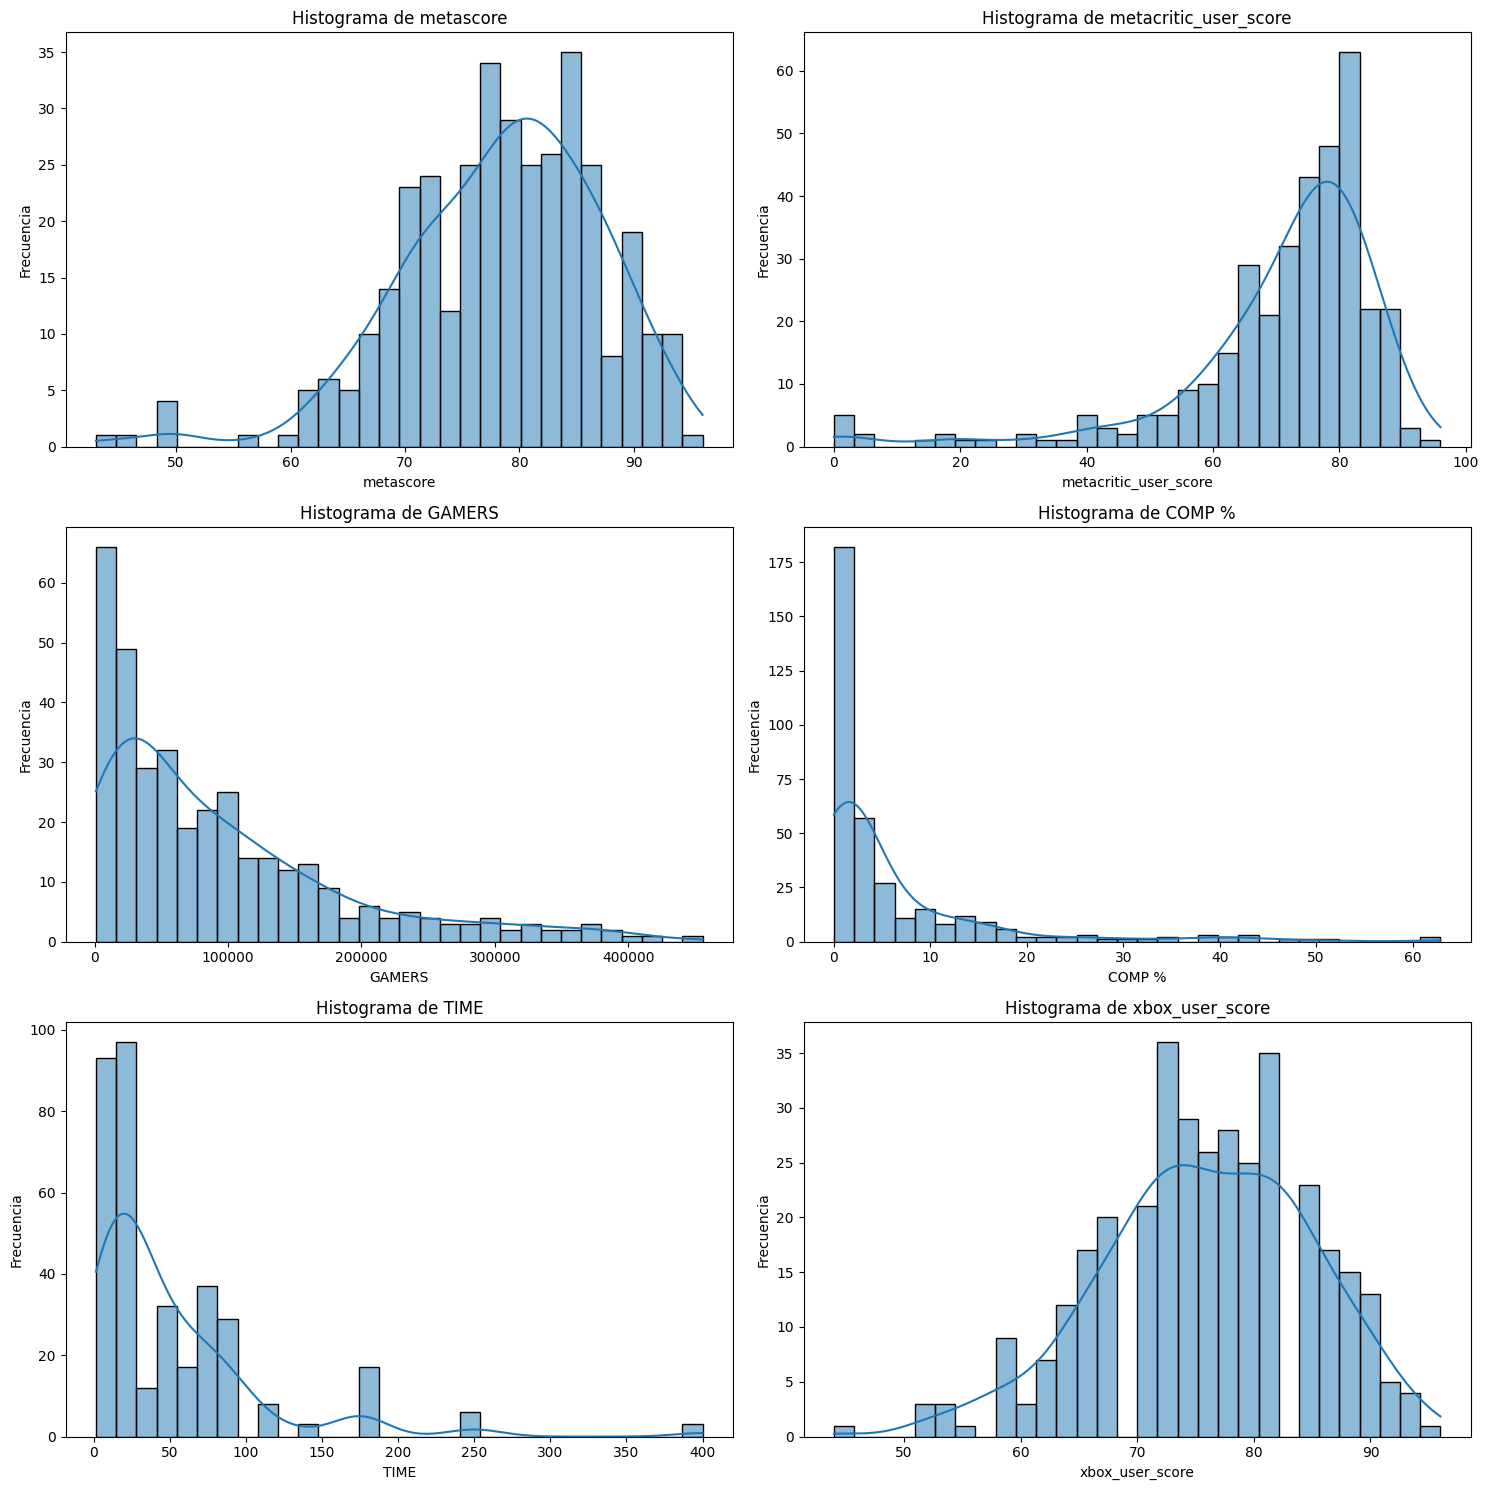

In [28]:
funtils.plot_numerical_histograms(df_merged, numeric_columns, bins_list=[30,30,30,30,30,30], kde=True)

Revisando las gráficas, se pueden tener unas primeras conclusiones:
* En su debida proporción, las valoraciones dadas por criticos de Metacritic, usuarios de Metacritic y usuarios de Xbox en el valor máximo pero los estadísticos de las valoraciones de críticos de Metacritic y usuarios de Xbox se parecen mucho más.
* Como se vió anttes, hay juegos que durán alrededor de 30 horas en su mayoría.
* Después de hacer el corte de número de jugadores en cada juego, se tiene una media significativa de alrededor de 100,000 jugadores
* Hay bastantes juegos que no han sido completados, ni siquiera llevan un 10% de completado. Habría que analizar que valoraciones tienen esos juegos.

## Análisis bivariante

Para el análisis bivariante, se harán unas variables categóricas de cada variable de valoración teniendo 5 categorías para cada uno: "Muy positivas", "Positivas", "Variadas", "Negativas" y "Muy negativas"

In [29]:
# Aplicar la función a las columnas de valoración
df_merged[cons.METACRITIC_USER_SCORE_CAT] = funtils.categorize_score(df_merged[cons.METACRITIC_USER_SCORE], cons.CAT_BINS, cons.CAT_VALSV)
df_merged[cons.XBOX_USER_SCORE_CAT] = funtils.categorize_score(df_merged[cons.XBOX], cons.CAT_BINSV, cons.CAT_VALS)
df_merged[cons.METASCORE_CAT] = funtils.categorize_score(df_merged[cons.METASCORE], cons.CAT_BINS, cons.CAT_VALS)

df_merged.head()

,metascore,title,metacritic_user_score,GAMERS,COMP %,TIME,xbox_user_score,metacritic_user_score_cat,xbox_user_score_cat,metascore_cat
0,78.0,olija,0.0,4380,14.2,4.5,66.0,Muy negativas,Positivas,Positivas
1,68.0,gang beasts,0.0,135527,9.3,1.5,58.0,Muy negativas,Variadas,Positivas
2,56.0,recompile,0.0,7808,6.1,7.0,64.0,Muy negativas,Positivas,Variadas
3,65.0,moonglow bay,0.0,4060,2.9,45.0,70.0,Muy negativas,Positivas,Positivas
4,72.0,lawn mowing simulator,0.0,33974,0.1,70.0,66.0,Muy negativas,Positivas,Positivas


### Análisis entre categóricas y numéricas

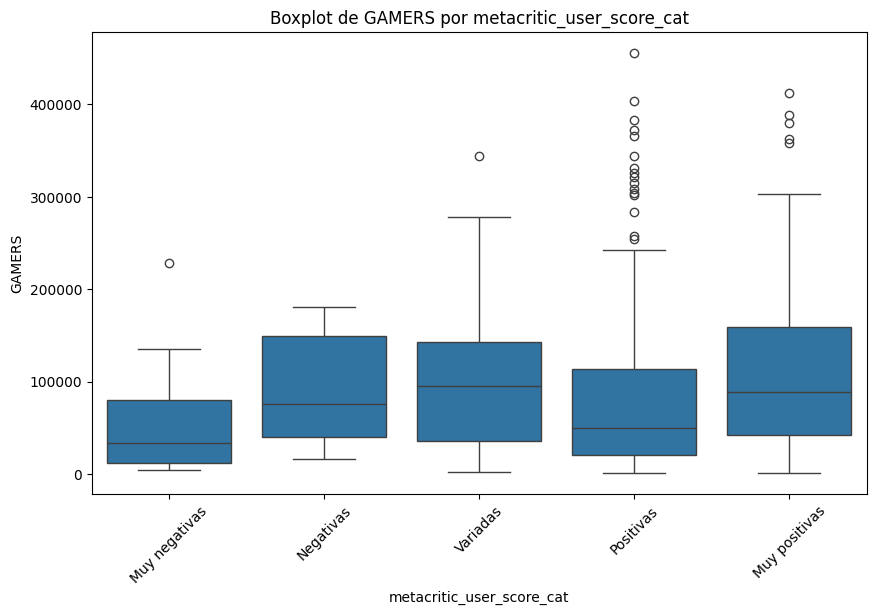

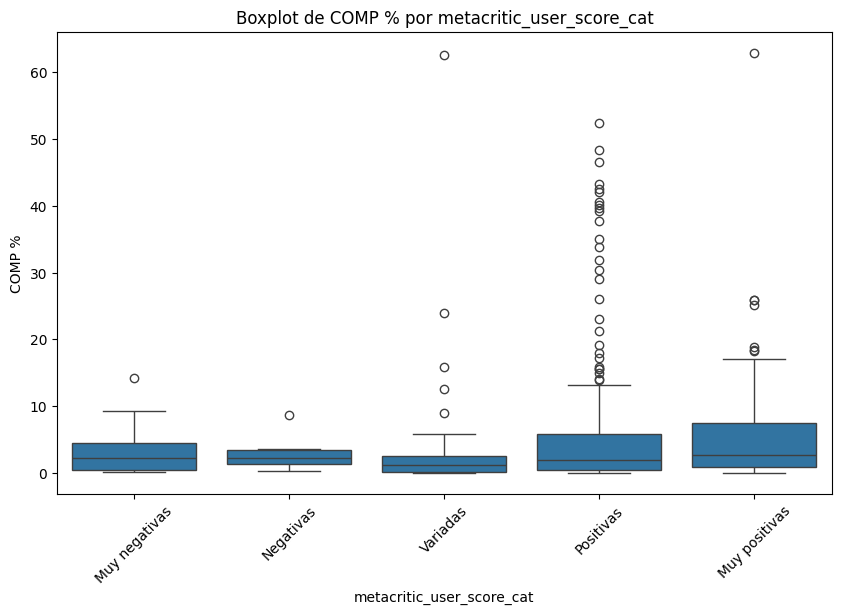

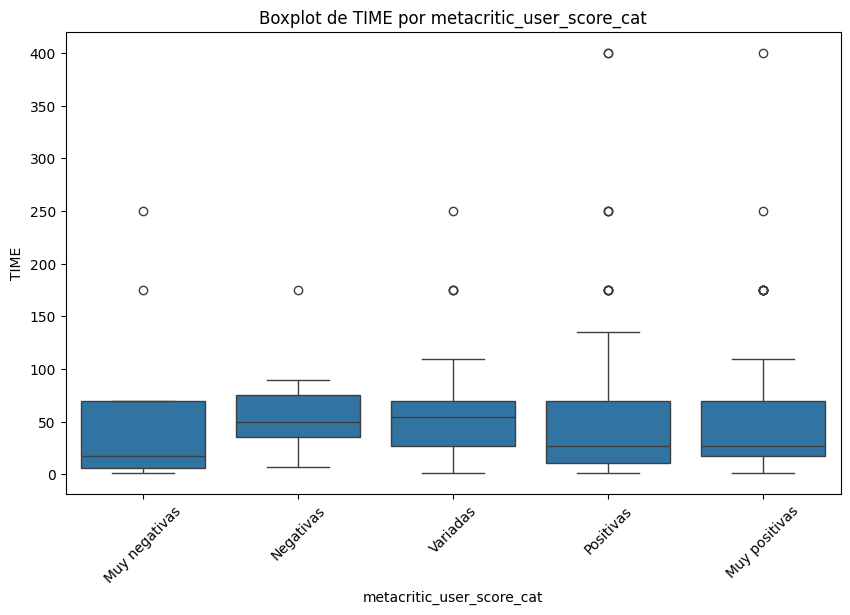

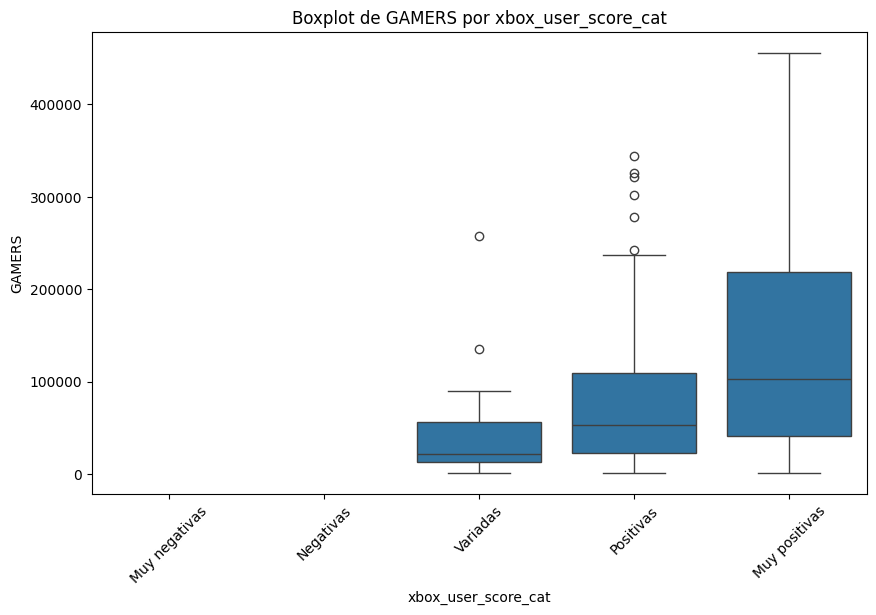

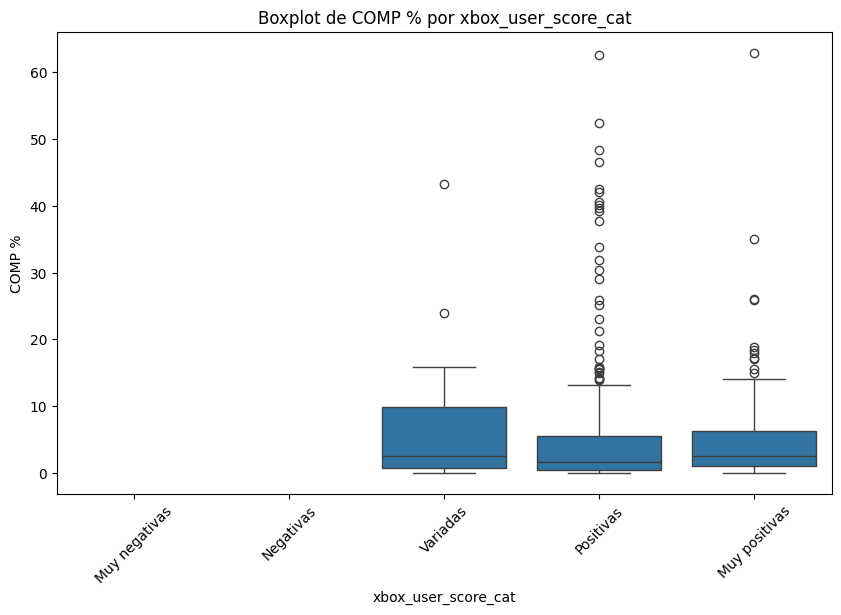

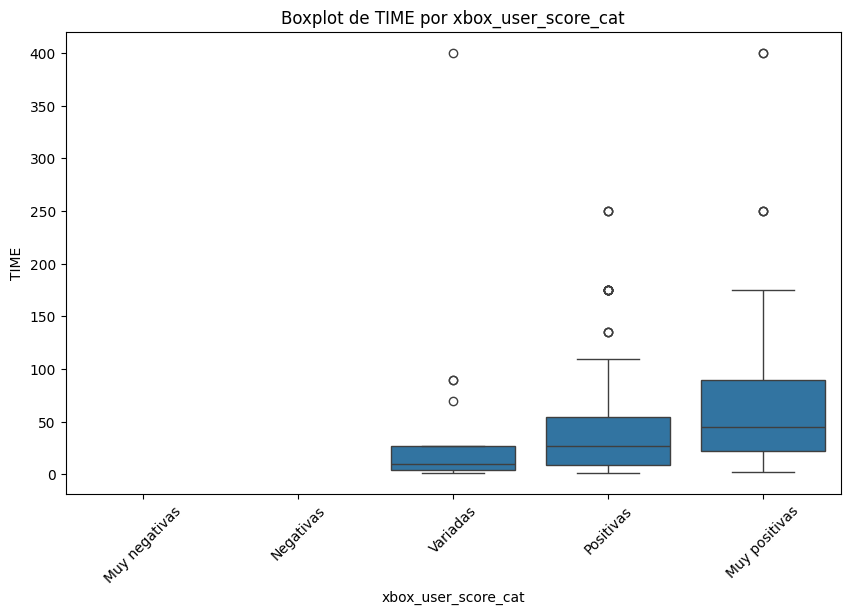

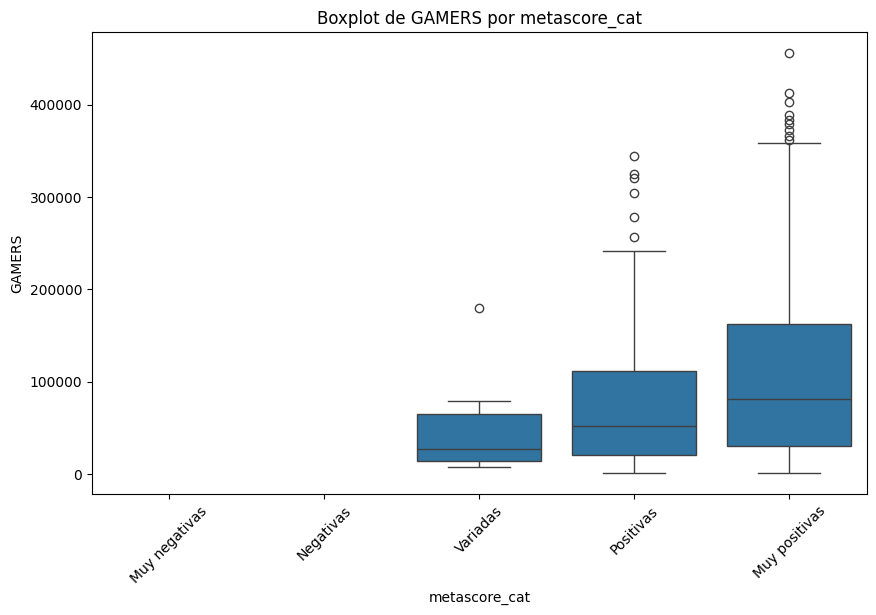

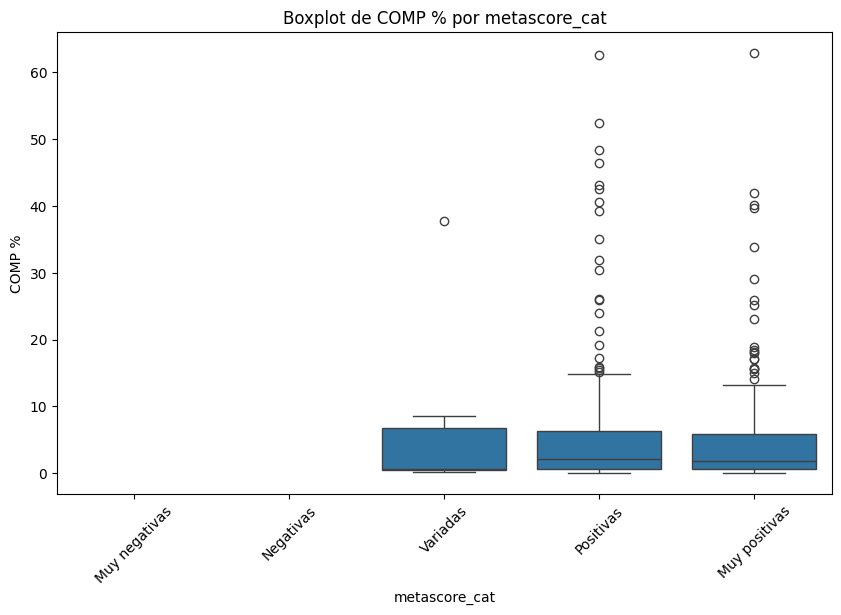

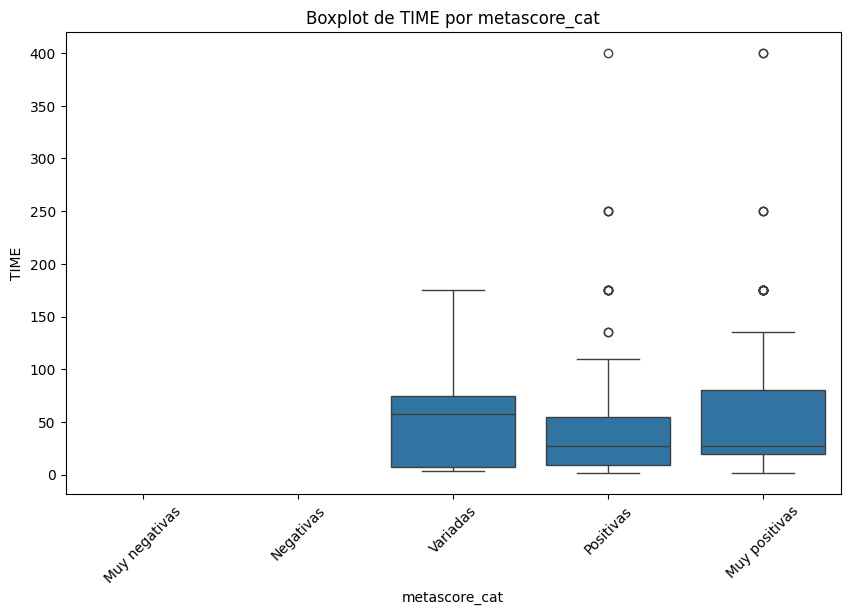

In [30]:
# Crear una lista de columnas categóricas y numéricas a analizar
categorical_columns = [cons.METACRITIC_USER_SCORE_CAT, cons.XBOX_USER_SCORE_CAT, cons.METASCORE_CAT]
numerical_columns_s = [cons.TIME, cons.GAMERS, cons.COMP]

# Llamar a la función con los datos y columnas correspondientes
funtils.plot_categorical_numerical_boxplots(df_merged, categorical_columns, numerical_columns_s)

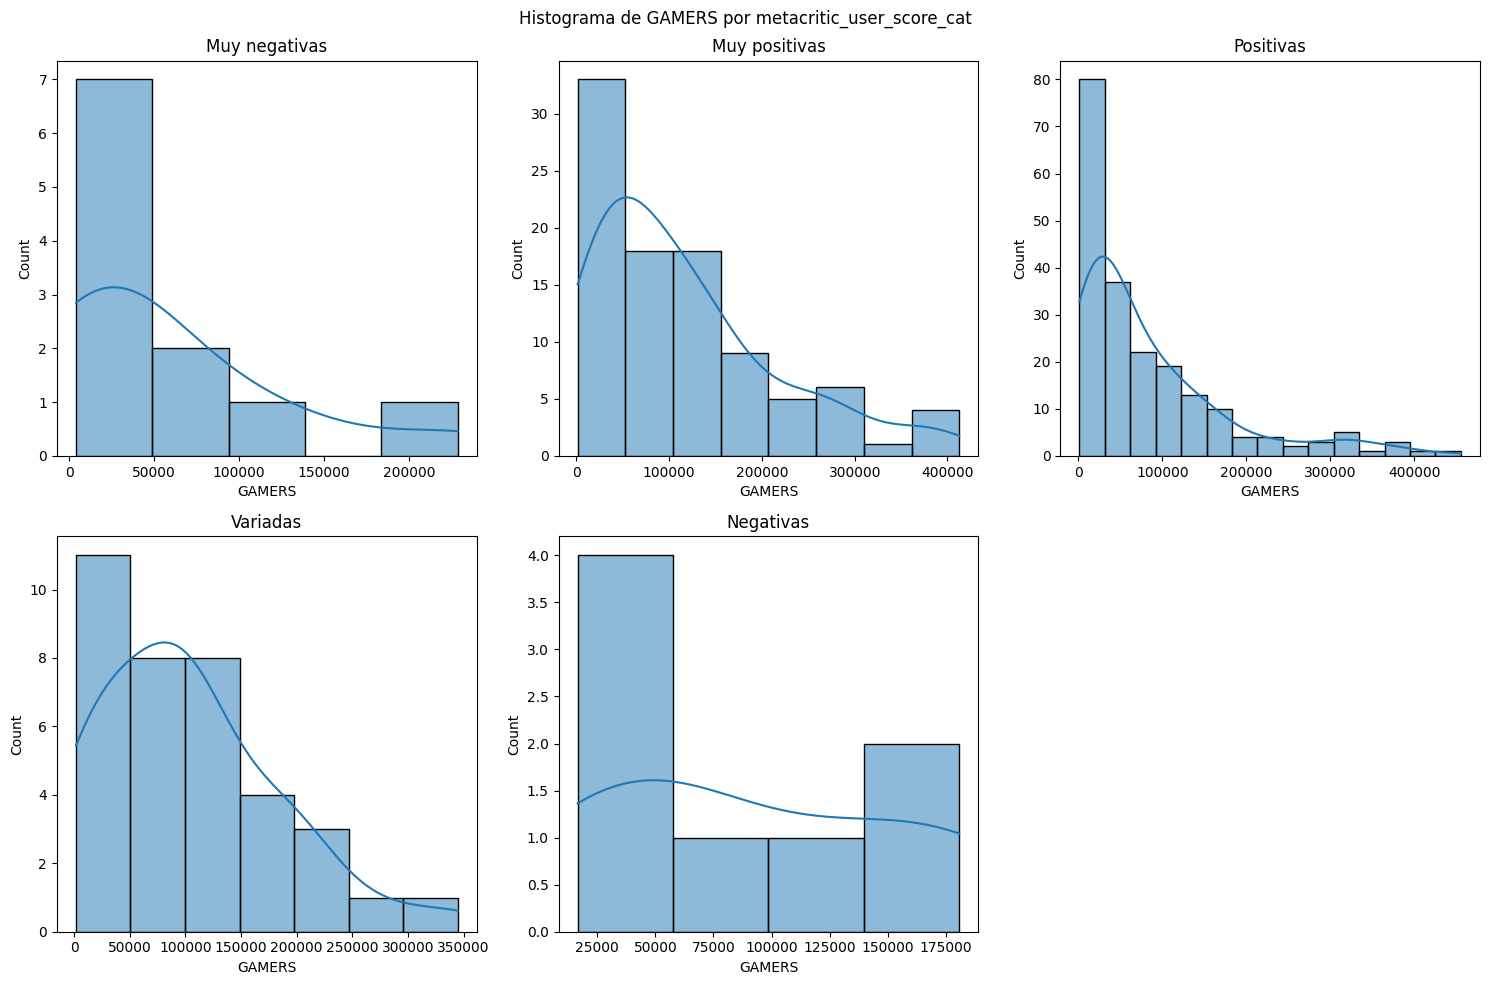

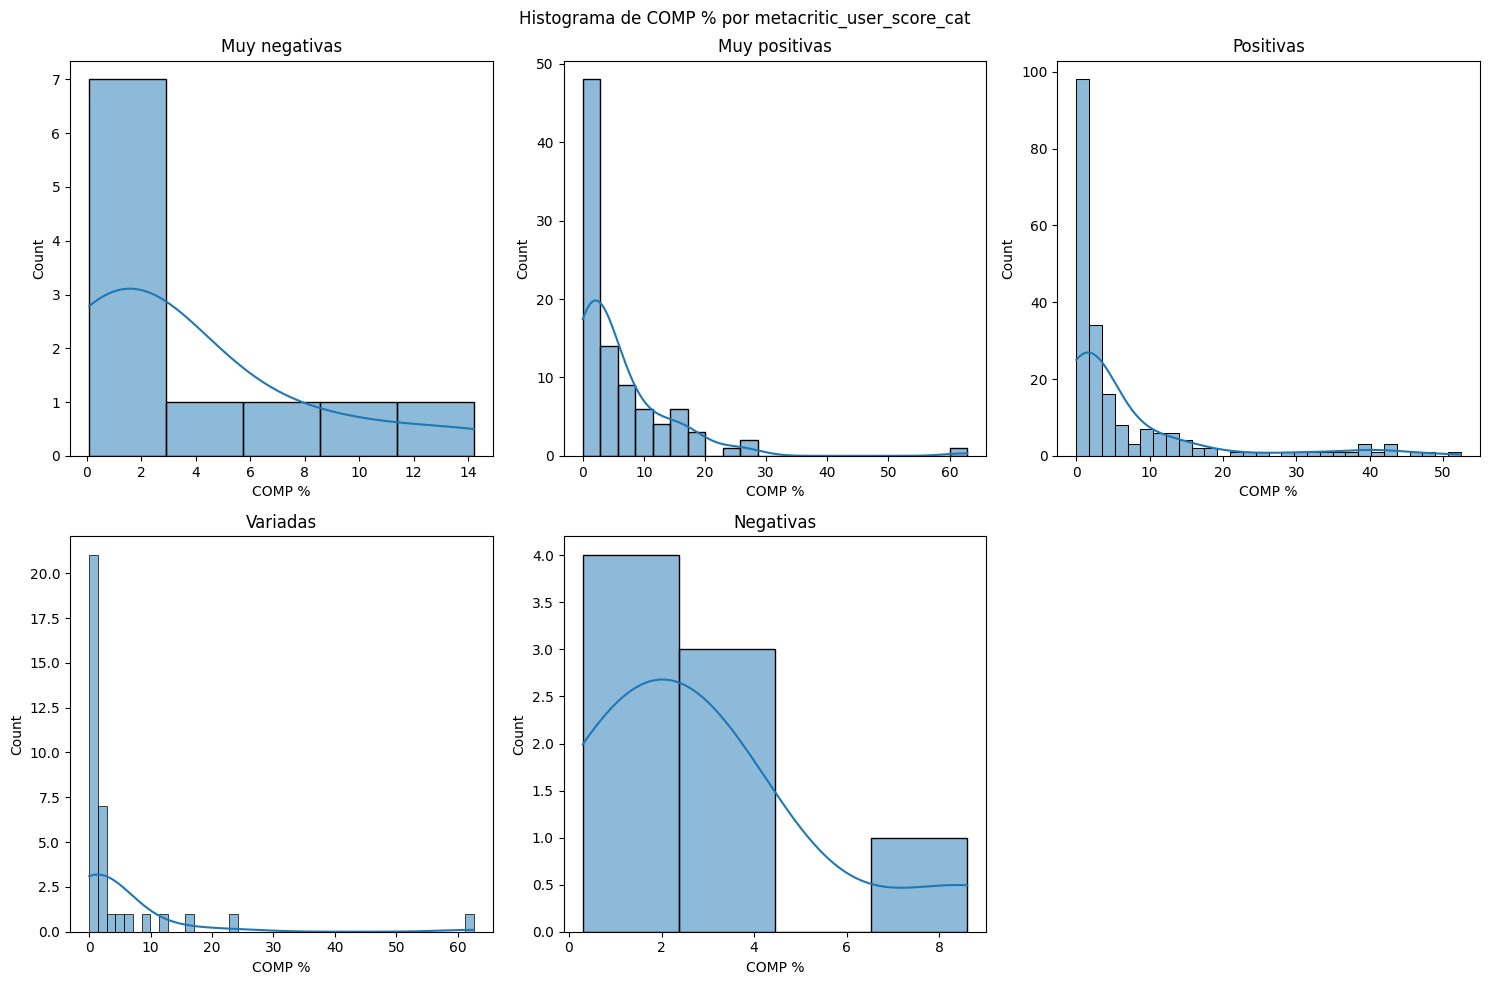

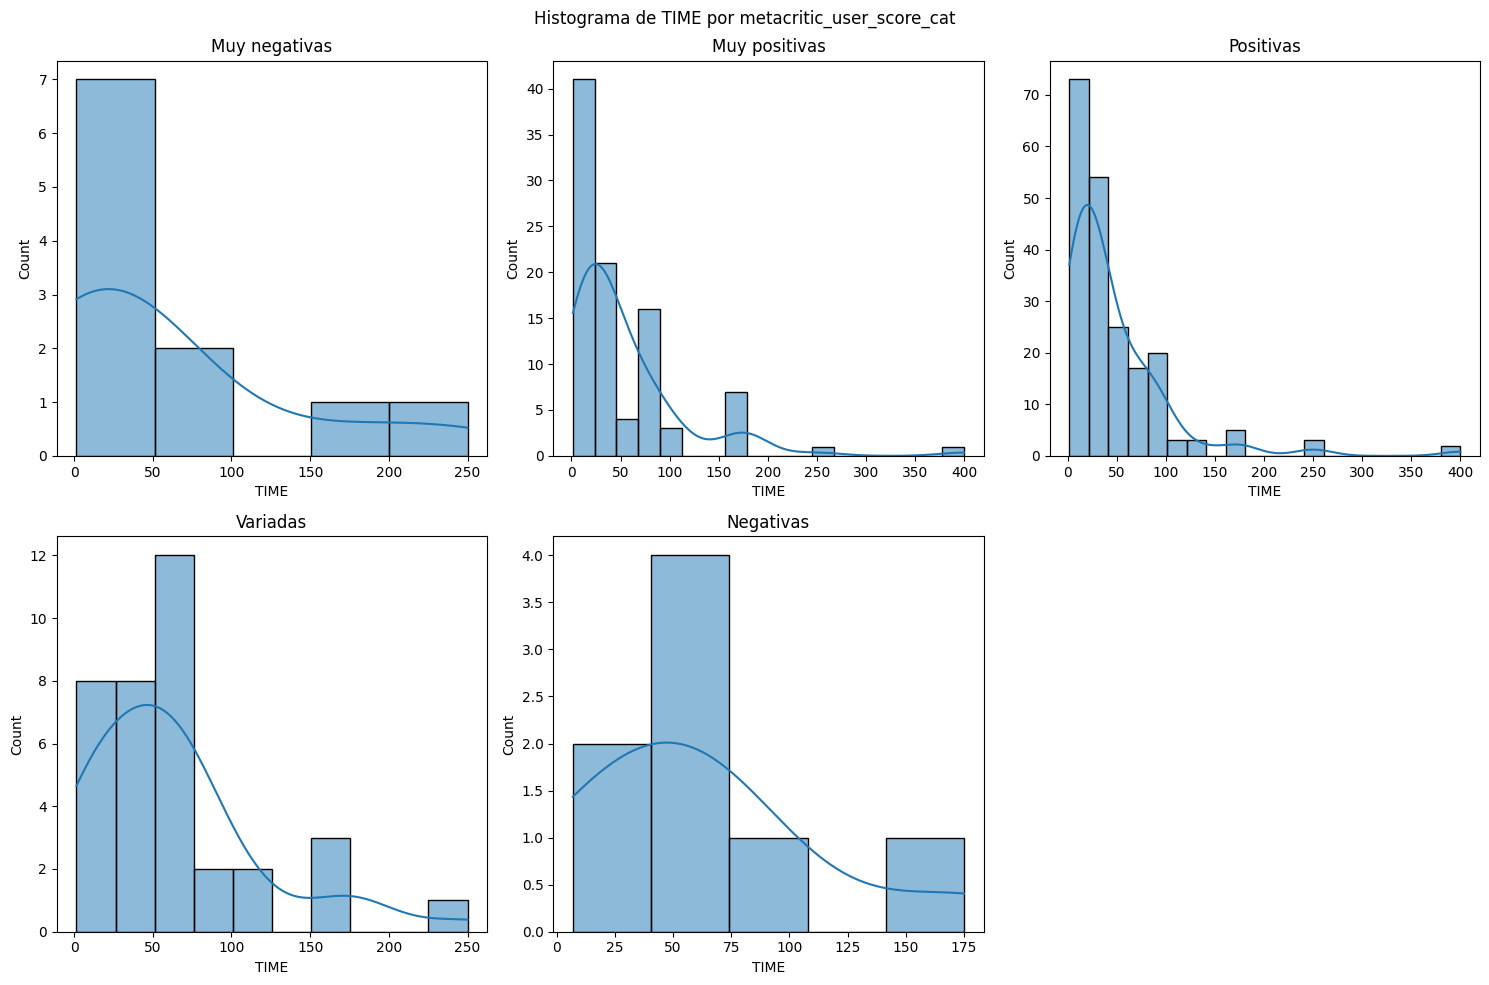

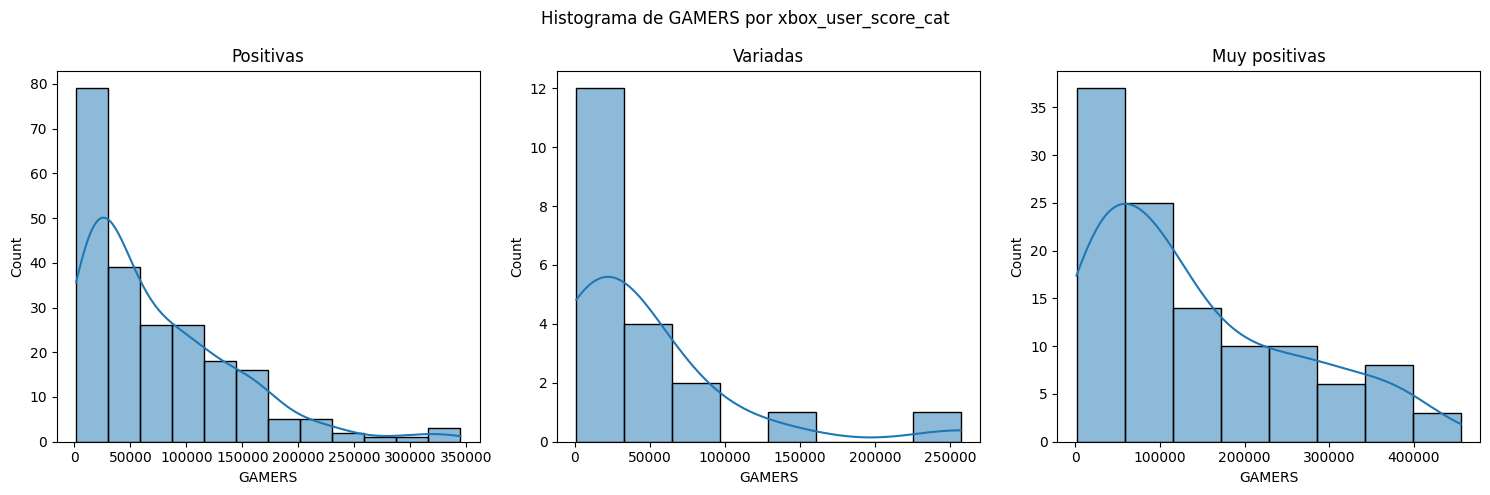

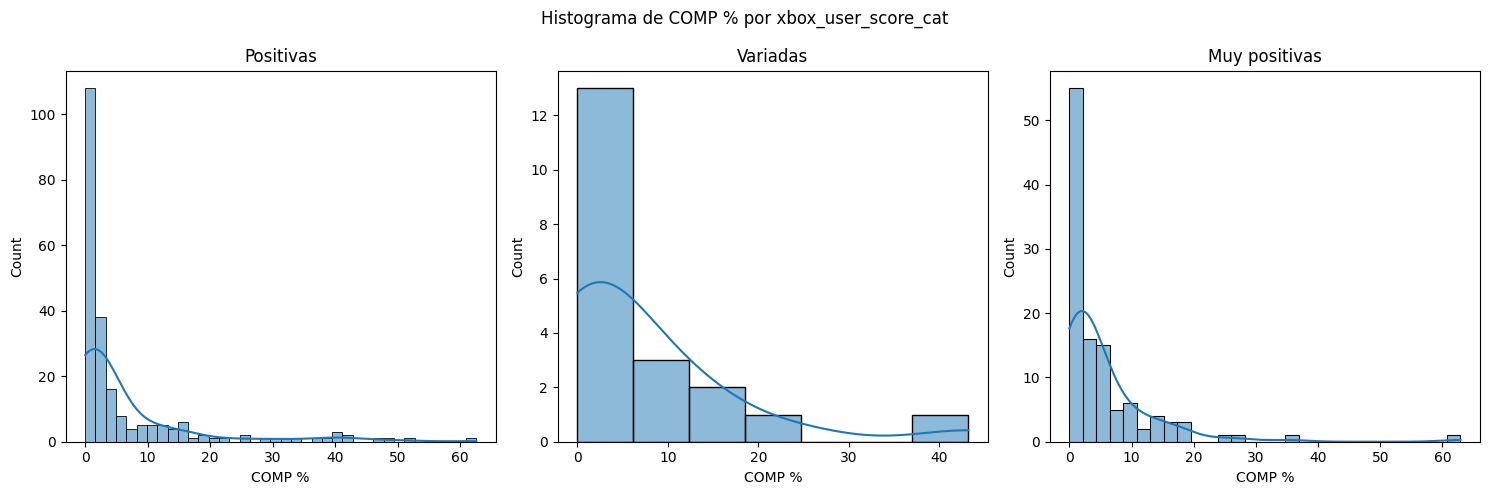

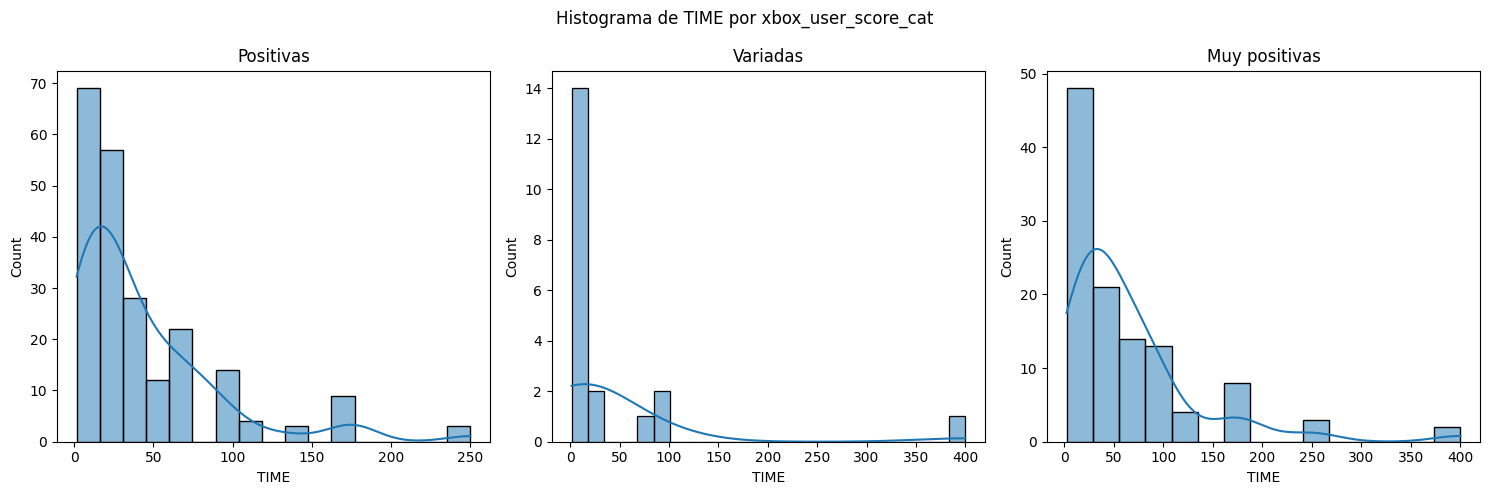

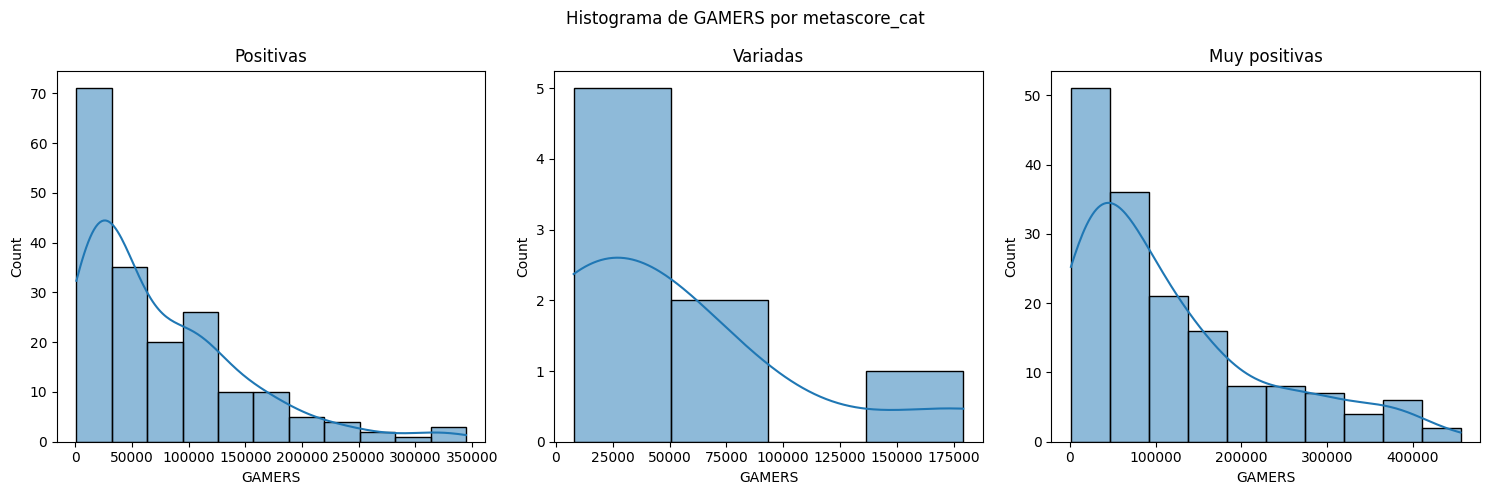

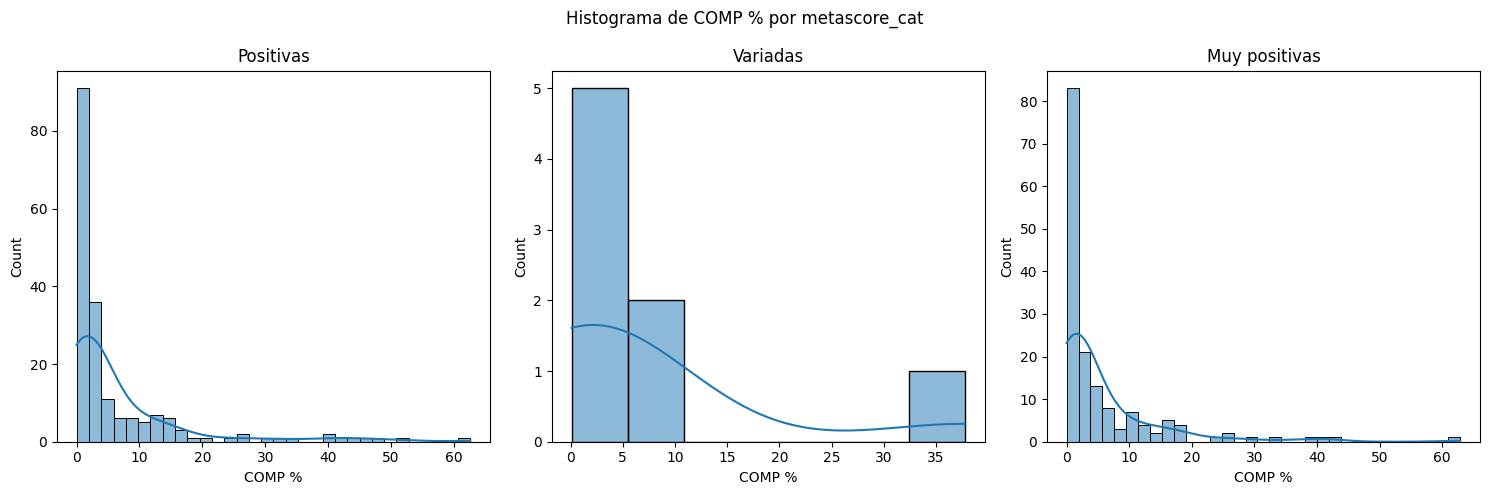

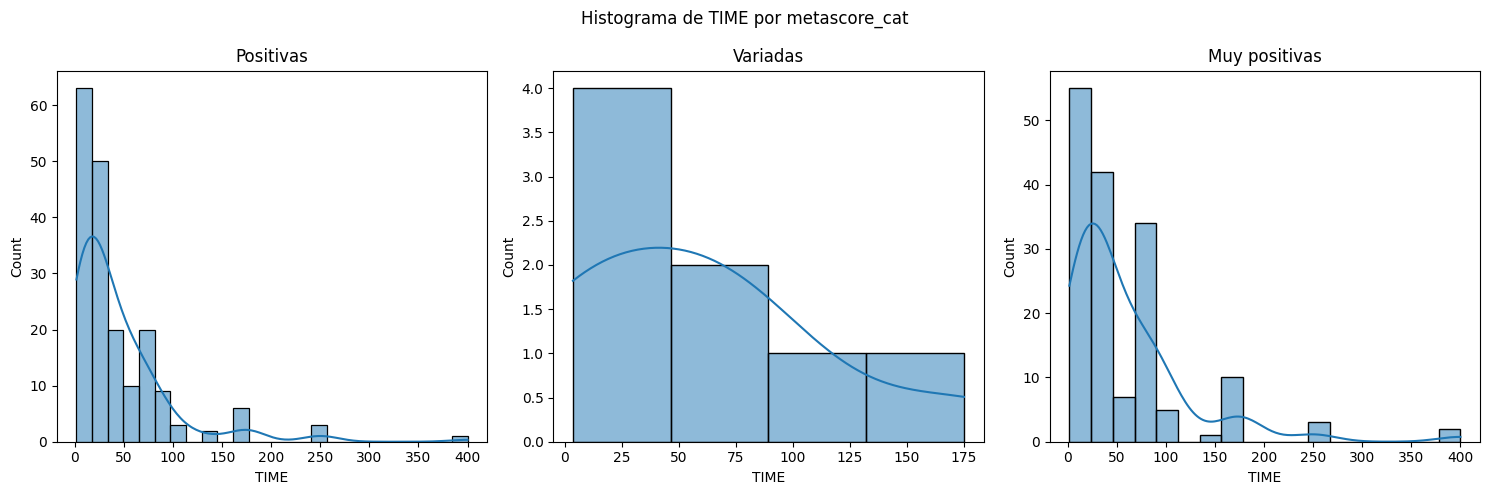

In [31]:
# Crear gráficos de histogramas para cada combinación de columna categórica y numérica
for cat_col in categorical_columns:
    for num_col in numerical_columns_s:
        funtils.plot_categorical_numerical_histograms(df_merged, cat_col, num_col)

In [39]:
# Se revisarán algunos registros en los que metacritic_user_score_cat es muy negativo y ver si son valores igual a cero
df_merged[(df_merged[cons.METACRITIC_USER_SCORE_CAT] == 'Muy negativas')].sort_values(by=cons.METACRITIC_USER_SCORE_CAT, ascending=False)

,metascore,title,metacritic_user_score,GAMERS,COMP %,TIME,xbox_user_score,metacritic_user_score_cat,xbox_user_score_cat,metascore_cat
348,82.0,ea sports ufc 4,20.0,66145,0.5,17.5,68.0,Muy negativas,Positivas,Muy positivas
349,66.0,star wars battlefront ii,19.0,228476,1.7,70.0,76.0,Muy negativas,Positivas,Positivas
350,79.0,fifa 20,18.0,93669,0.3,175.0,66.0,Muy negativas,Positivas,Positivas
351,77.0,fifa 21,15.0,38890,0.5,250.0,66.0,Muy negativas,Positivas,Positivas
352,70.0,madden nfl 22,6.0,15217,2.2,3.5,54.0,Muy negativas,Variadas,Positivas
353,69.0,madden nfl 21,5.0,22414,3.0,9.0,64.0,Muy negativas,Positivas,Positivas
0,78.0,olija,0.0,4380,14.2,4.5,66.0,Muy negativas,Positivas,Positivas
2,56.0,recompile,0.0,7808,6.1,7.0,64.0,Muy negativas,Positivas,Variadas
1,68.0,gang beasts,0.0,135527,9.3,1.5,58.0,Muy negativas,Variadas,Positivas
3,65.0,moonglow bay,0.0,4060,2.9,45.0,70.0,Muy negativas,Positivas,Positivas


La mitad de registros que son catalogados como "Muy Negativo" en `metacritic_user_score_cat`  tienen un valor de cero en su homólogo numérico. Puede significar que hay usuarios que no han  calificado esos títulos.

### Análisis entre numéricas

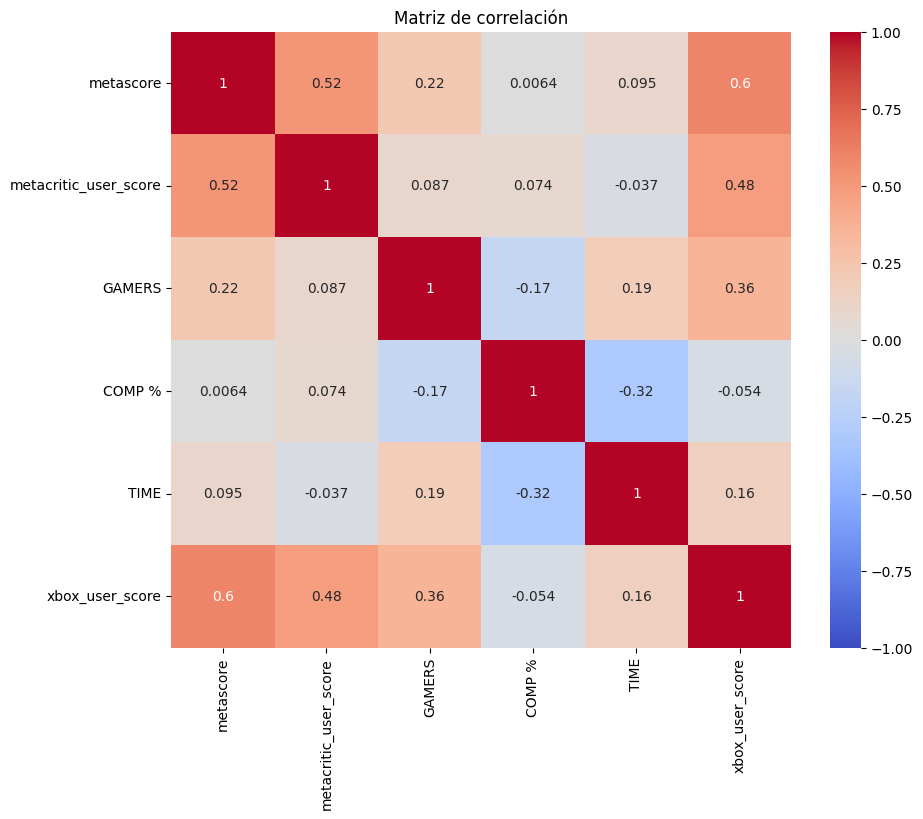

In [33]:
# Calcular la matriz de correlación
correlation_matrix = df_merged[numeric_columns].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()


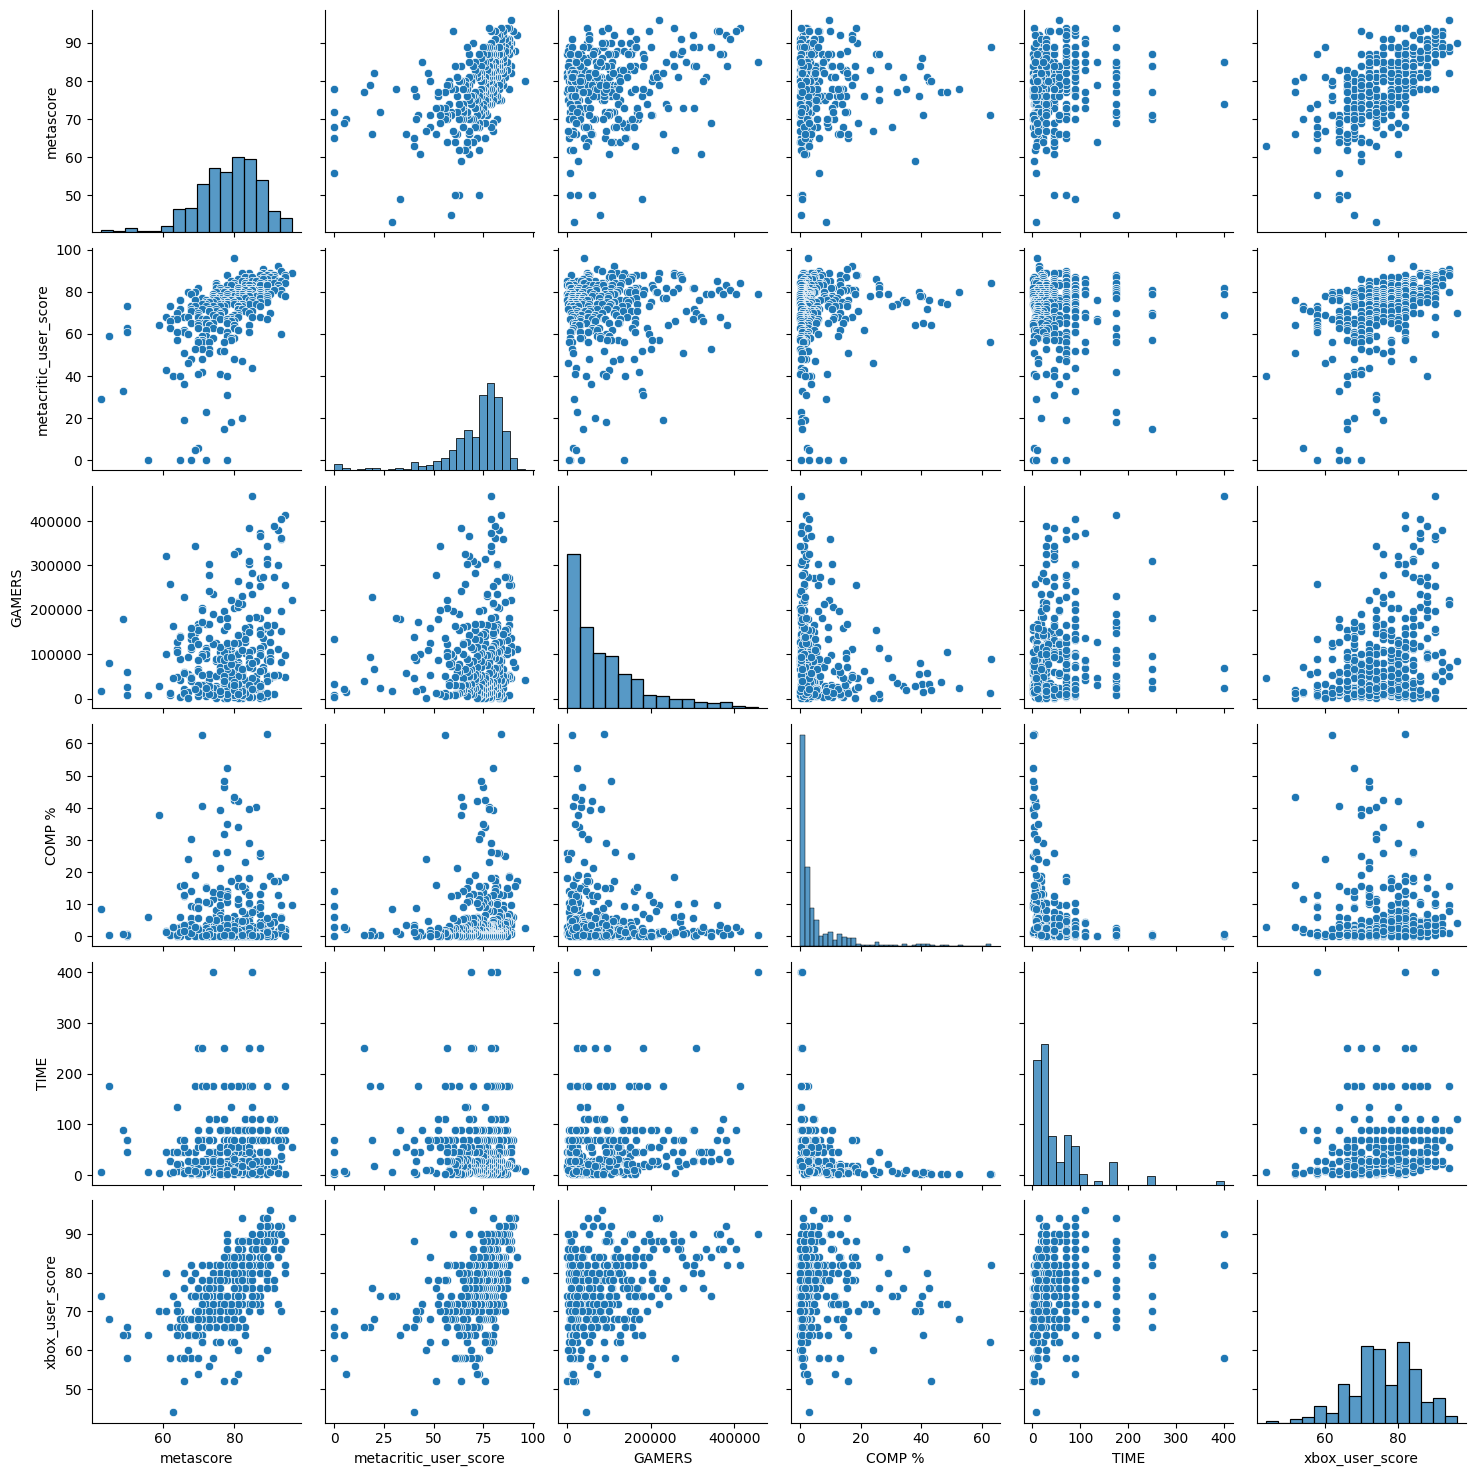

In [34]:
# Visualizar gráficos de dispersión para cada par de variables numéricas
sns.pairplot(df_merged[numeric_columns])
plt.show()

Del análisis bivariante, se puede concluir lo siguiente:
* No hay alguna relación significativa entre las variables numéricas, por lo que no nos ayuda en este análisis.
* Al hacer las variables de valoración a tipo categóricas, se puede observar tanto en los histogramas como en los boxplot que las valoraciones de los usuarios de metacritic son muy distintos a los de los usuarios de Xbox y críticos de  Metacritic. Esto nos podría suponer que la opinión de usuarios de Metacritic no es muy confiable. Además, en un acercamiento a los registros con la categoría "Muy negativo" casi la mitad no tenían  calificación así que se puede suponer que los usuarios no se han tomado el tiempo para poder calificar  los títulos.
* Los títulos con valoraciones "Muy positivas" tienen grandes números de jugadores y tiempo medio para completar alto, pero no altos porcentajes de completados. Entonces podemos tener una  afirmaciión  de que los jugadores aprovechan el servicio de Game Pass para jugar títulos muy bien valorados.


## Análisis Multivariante

En base a los  análisis previos, se hará analisis multivariante entre número de jugadores, porcentaje de  completado y tiempo de cada título con cada valoración categórica.